## GRIP @ The Sparks Foundation 
## Task 2 : Color Identification in Images
## Author: Mahesh Reddy

Implement an image color detector which identifies all the colors in an  image or video.

In [1]:
#Import required Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from collections import Counter
import cv2

In [2]:
#Reading an Image
def get_img(file_path):
    image = cv2.imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

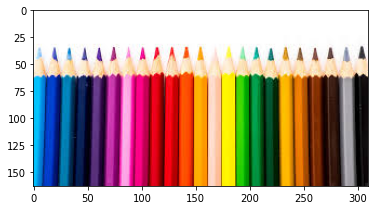

In [3]:
image = get_img("colors/imgg.jpeg")
plt.imshow(image)

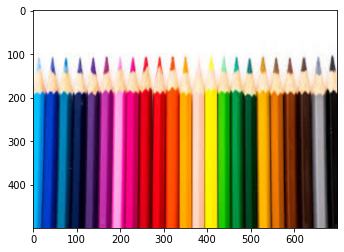

In [4]:
#Resize the image
image = cv2.resize(image, (700, 500))

plt.imshow(image)

In [5]:
print(image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[  6 190 252]
  [  5 190 252]
  [  3 191 252]
  ...
  [ 36  34  35]
  [ 42  40  41]
  [ 44  42  43]]

 [[  6 190 252]
  [  5 190 252]
  [  4 191 252]
  ...
  [ 37  35  36]
  [ 43  41  42]
  [ 46  44  45]]

 [[  6 190 252]
  [  5 190 252]
  [  3 191 252]
  ...
  [ 37  35  36]
  [ 43  42  43]
  [ 46  44  45]]]


In [6]:
#checking shape of the image
image.shape

(500, 700, 3)

In [7]:
#checking the type of the image
type(image)

numpy.ndarray

In [8]:
x = image.reshape(image.shape[0]*image.shape[1],3)
x

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [ 37,  35,  36],
       [ 43,  42,  43],
       [ 46,  44,  45]], dtype=uint8)

In [9]:
#Finding the top 5 color using kmeans
km = KMeans(n_clusters=8)

In [10]:
km.fit(x)

KMeans()

In [11]:
top_colors = km.cluster_centers_
top_colors = top_colors.astype(int)
print(top_colors)

[[244 180   5]
 [235 198 183]
 [ 26  27  35]
 [194  38   9]
 [253 252 251]
 [ 21 165  26]
 [176  34 127]
 [  5 113 197]]


Text(0.5, 1.0, 'Prominent Colors')

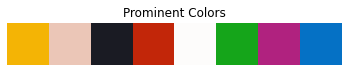

In [12]:
plt.imshow([top_colors])
plt.axis('off')
plt.title("Prominent Colors")

In [13]:
intensity_list = Counter(km.labels_)
print(intensity_list)

Counter({4: 100613, 2: 64677, 1: 46990, 3: 41748, 0: 30723, 6: 29228, 7: 21081, 5: 14940})


In [14]:
keys = list(intensity_list.keys())
values = list(intensity_list.values())
print(keys)
print(values)

[4, 1, 6, 2, 0, 3, 7, 5]
[100613, 46990, 29228, 64677, 30723, 41748, 21081, 14940]


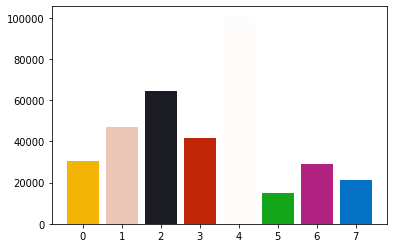

In [15]:
#Visualization Of Prominency level
bar_graph = plt.bar(keys,values)
for x in range(0, len(top_colors)):
  s=bar_graph[x].set_color(top_colors[keys[x]].astype(float)/255.0)
plt.show(bar_graph)

In [16]:
#Finding images using Colors
Dir_name = 'colors'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'RED':[128,0,0],
    'BLACK': [0,0,0],
    'WHITE': [255,255,255]
}

images = []

for file in os.listdir(Dir_name):
    if file.startswith('i'):
        images.append(get_img(os.path.join(Dir_name, file)))

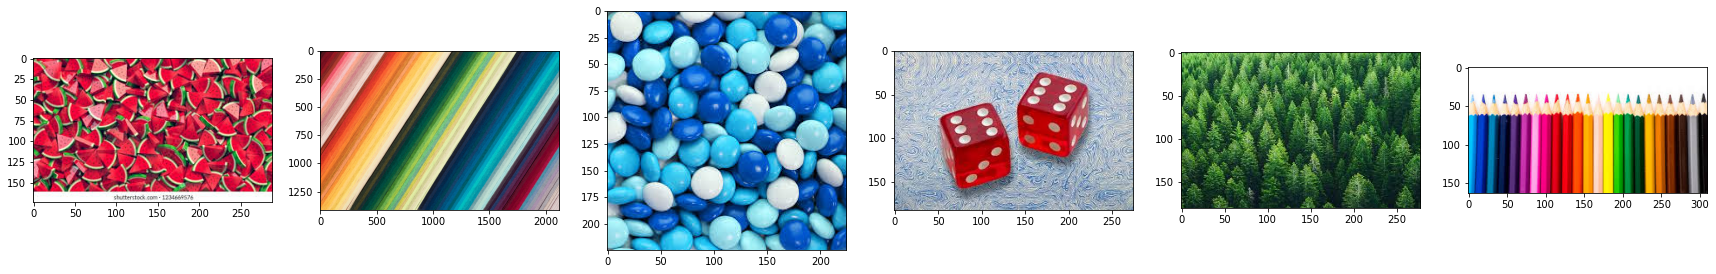

In [17]:
plt.figure(figsize=(30, 25))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [18]:
def get_colors(image,number_of_colors,show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    return rgb_colors

In [19]:
from skimage.color import rgb2lab, deltaE_cie76
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color,curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [20]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

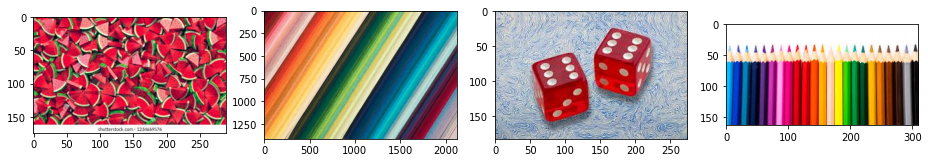

In [21]:
#RED Color Detections 
selected_color=COLORS['RED']
threshold=60
plt.figure(figsize = (20, 10))
show_selected_images(images,selected_color, threshold, 5)

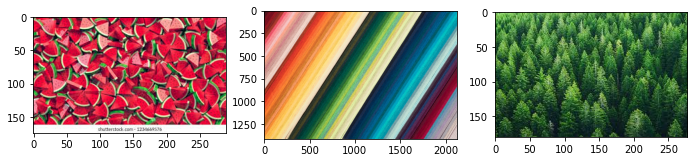

In [22]:
#Green Color Detections 
selected_color=COLORS['GREEN']
threshold=60
plt.figure(figsize = (20, 10))
show_selected_images(images,selected_color, threshold, 5)

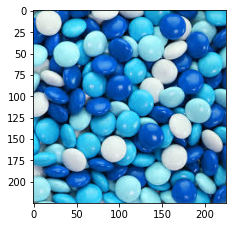

In [23]:
#Blue Color Detections 
selected_color=COLORS['BLUE']
threshold=60
plt.figure(figsize = (20, 10))
show_selected_images(images,selected_color, threshold, 5)